In [1]:
# Here we do the simulations for the Figure 4A

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# There are four different probabilities p for positive outcomes (r = 1). The probability for negative outcomes (r = -1) is therefore 1-p.
# In the "low-reward" task, the best action has a probability for a positive outcome of 0.2, and the other action of 0.1. 
# In the "high-reward' task, these two probabilities are 0.9 and 0.8.
ProbabilityOfPositiveOutcome = np.array([.75, .25]) 

# Each task lasts for 800 trials and there are 5,000 iterations.
NumberOfTrials = 800
NumberOfIterations = 5000

# The temperature parameter beta is set to 0.3 for all three learners (optimistic, rational and pessimistic).
beta = 0.3

In [2]:
# LearnerIdx refers to the identity of the learner.
for learnerIdx in range(4):

    if learnerIdx == 0:
        alphaPos, alphaNeg = .4, .1 # Optimistic learner
    elif learnerIdx == 1:
        alphaPos, alphaNeg = .1, .1 # Rational learner
    elif learnerIdx == 2:
        alphaPos, alphaNeg = .1, .4 # Pessimistic learner        
    else:
        w = .1 # Meta-learner 

    # We will compute the performance on each trial for all the iterations
    performance = np.nan * np.ones((NumberOfTrials, NumberOfIterations))

    NumberOfPositiveOutcomesBestAction = int(ProbabilityOfPositiveOutcome[0] * NumberOfTrials)
    NumberOfNegativeOutcomesBestAction = NumberOfTrials - NumberOfPositiveOutcomesBestAction

    NumberOfPositiveOutcomesWorstAction = int(ProbabilityOfPositiveOutcome[1] * NumberOfTrials)
    NumberOfNegativeOutcomesWorstAction = NumberOfTrials - NumberOfPositiveOutcomesWorstAction        

    for iterationIdx in range(NumberOfIterations):

        # The initial Q-values are set to 0. (The first element is the Q-value associated with the worst action, and the second with the best action.)
        Q = np.zeros(2)

        # We create a vector for the outcomes (r = 1 or r = -1) that will be observed on each trial
        OutcomesBestAction = np.concatenate((np.ones((NumberOfPositiveOutcomesBestAction,), dtype=np.int), - np.ones((NumberOfNegativeOutcomesBestAction,), dtype=np.int)))
        random.shuffle(OutcomesBestAction)

        OutcomesWorstAction = np.concatenate((np.ones((NumberOfPositiveOutcomesWorstAction,), dtype=np.int), - np.ones((NumberOfNegativeOutcomesWorstAction,), dtype=np.int)))
        random.shuffle(OutcomesWorstAction) 

        Outcomes = np.nan * np.ones(NumberOfTrials)

        for t in range(NumberOfTrials):

            ProbabilityToChooseBestAction = 1/(1+np.exp((Q[0]-Q[1])/beta))
            if random.random() < ProbabilityToChooseBestAction:
                action = 1 # the chosen action is the best one.
                Outcomes[t] = OutcomesBestAction[t]
            else:
                action = 0 # the chosen action is the worst one.
                Outcomes[t] = OutcomesWorstAction[t]
            performance[t, iterationIdx] = action

            deltaQ = Outcomes[t] - Q[action]
            if learnerIdx < 3: # The update rule for the optimistic, rational and pessimistic learner
                Q[action] += alphaPos * deltaQ * (deltaQ >= 0) + alphaNeg * deltaQ * (deltaQ < 0)
            else: # The update rule for the meta-learner
                if t == 0:
                    ProbaReward = .5
                else:
                    ProbaReward = (np.mean(Outcomes[:t]) + 1)/2
                alphaPos = w * (1 - ProbaReward)
                alphaNeg = w * ProbaReward
                Q[action] += alphaPos * deltaQ * (deltaQ >= 0) + alphaNeg * deltaQ * (deltaQ < 0)

    if learnerIdx == 0:
        meanPerformanceOptimistic = np.mean(performance, axis=1)
    elif learnerIdx == 1:
        meanPerformanceRational = np.mean(performance, axis=1)
    elif learnerIdx == 2:
        meanPerformancePessimistic = np.mean(performance, axis=1)
    else:
        meanPerformanceMetaLearner = np.mean(performance, axis=1)


In [3]:
# We now draw the figure 4A:
plt.figure(4)

plt.subplot(3,2,1)
plt.plot(meanPerformanceOptimistic, 'g', linewidth=1)
plt.plot(meanPerformanceRational, 'b', linewidth=1)
plt.plot(meanPerformancePessimistic, 'r', linewidth=1) 
plt.plot(meanPerformanceMetaLearner, 'm', linewidth=1)

plt.axis([0, 800, .45, 1])

plt.yticks([.5, 1.0])
plt.ylabel('P(best choice)')

plt.xticks([100, 800])
plt.xlabel('Episodes')

# Here I insert the texts around the figure:
plt.text(100, 0.68,'p(reward|arm#1) = 0.25')
plt.text(100, 0.55,'p(reward|arm#2) = 0.75')
plt.text(0.01, 0.9, 'A', fontsize=14, weight='bold', transform=plt.gcf().transFigure)
plt.text(0.01, 0.37, 'B', fontsize=14, weight='bold', transform=plt.gcf().transFigure)
plt.text(0.62, 0.85, 'Meta-learner', fontsize=12, color = 'm', transform=plt.gcf().transFigure)
plt.text(0.62, 0.78, 'Optimistic', fontsize=12, color = 'g', transform=plt.gcf().transFigure)
plt.text(0.62, 0.71, 'Rational', fontsize=12, color = 'b', transform=plt.gcf().transFigure)
plt.text(0.62, 0.64, 'Pessimistic', fontsize=12, color = 'r', transform=plt.gcf().transFigure)

#plt.show()

Text(0.62,0.64,'Pessimistic')

In [4]:
# Now we start the simulations for Figure 4B:

ProbabilityOfPositiveOutcome = np.matrix([[.2, .15, .1], [.9, .85, .8]])

In [5]:
for learnerIdx in range(4):

    if learnerIdx == 0:
        alphaPos, alphaNeg = .4, .1 # Optimistic learner
    elif learnerIdx == 1:
        alphaPos, alphaNeg = .1, .1 # Rational learner
    elif learnerIdx == 2:
        alphaPos, alphaNeg = .1, .4 # Pessimistic learner        
    else:
        w = .1 # Meta-learner 

    # We will compute the performance on each trial for all the iterations
    performance = np.nan * np.ones((NumberOfTrials, NumberOfIterations, len(ProbabilityOfPositiveOutcome)))

    # ConditionIdx refers to the task: 0 for the low-reward task, 1 for the high-reward task.
    for conditionIdx in range(len(ProbabilityOfPositiveOutcome)):

        NumberOfPositiveOutcomesBestAction = int(ProbabilityOfPositiveOutcome[conditionIdx, 0] * NumberOfTrials)
        NumberOfPositiveOutcomesMiddleAction = int(ProbabilityOfPositiveOutcome[conditionIdx, 1] * NumberOfTrials)
        NumberOfPositiveOutcomesWorstAction = int(ProbabilityOfPositiveOutcome[conditionIdx, 2] * NumberOfTrials)

        for iterationIdx in range(NumberOfIterations):
            
            # The initial Q-values are set to 0. (The first element is the Q-value associated with the best action, and the second with the middle action and the third with the worst action.)
            Q = np.zeros(3)

            # We create a vector for the outcomes (r = 1 or r = -1) that will be observed on each trial
            OutcomesBestAction = np.concatenate((np.ones((NumberOfPositiveOutcomesBestAction,), dtype=np.int), - np.ones((NumberOfTrials - NumberOfPositiveOutcomesBestAction,), dtype=np.int)))
            random.shuffle(OutcomesBestAction)
            OutcomesMiddleAction = np.concatenate((np.ones((NumberOfPositiveOutcomesMiddleAction,), dtype=np.int), - np.ones((NumberOfTrials - NumberOfPositiveOutcomesMiddleAction,), dtype=np.int)))
            random.shuffle(OutcomesMiddleAction)
            OutcomesWorstAction = np.concatenate((np.ones((NumberOfPositiveOutcomesWorstAction,), dtype=np.int), - np.ones((NumberOfTrials - NumberOfPositiveOutcomesWorstAction ,), dtype=np.int)))
            random.shuffle(OutcomesWorstAction) 
            
            Outcomes = np.nan * np.ones(NumberOfTrials)
            
            for t in range(NumberOfTrials):
                
                ProbabilityToChooseBestAction = [np.exp(Q[0]/beta), np.exp(Q[1]/beta), np.exp(Q[2]/beta)]/sum(np.exp(np.divide(Q, beta)))
                randomNumber = random.random()
                if randomNumber < ProbabilityToChooseBestAction[0]:
                    action = 0 # the chosen action is the best one.
                    Outcomes[t] = OutcomesWorstAction[t]
                elif randomNumber < ProbabilityToChooseBestAction[0]+ProbabilityToChooseBestAction[1]:
                    action = 1 # the chosen action is the middle one.
                    Outcomes[t] = OutcomesMiddleAction[t]
                else:
                    action = 2 # the chosen action is the worst one.
                    Outcomes[t] = OutcomesBestAction[t]                    
                performance[t, iterationIdx, conditionIdx] = 0 * (action < 2) + 1 * (action == 2)
                
                deltaQ = Outcomes[t] - Q[action]
                if learnerIdx < 3: # The update rule for the optimistic, rational and pessimistic learner
                    Q[action] += alphaPos * deltaQ * (deltaQ >= 0) + alphaNeg * deltaQ * (deltaQ < 0)
                else: # The update rule for the meta-learner
                    if t == 0:
                        ProbaReward = .5
                    else:
                        ProbaReward = (np.mean(Outcomes[:t]) + 1)/2
                    alphaPos = w * (1 - ProbaReward)
                    alphaNeg = w * ProbaReward
                    Q[action] += alphaPos * deltaQ * (deltaQ >= 0) + alphaNeg * deltaQ * (deltaQ < 0)
                               
    if learnerIdx == 0:
        meanPerformanceOptimisticLow, meanPerformanceOptimisticHigh = np.mean(performance[:,:,0], axis=1), np.mean(performance[:,:,1], axis=1)
    elif learnerIdx == 1:
        meanPerformanceRationalLow, meanPerformanceRationalHigh = np.mean(performance[:,:,0], axis=1), np.mean(performance[:,:,1], axis=1)
    elif learnerIdx == 2:
        meanPerformancePessimisticLow, meanPerformancePessimisticHigh = np.mean(performance[:,:,0], axis=1), np.mean(performance[:,:,1], axis=1)
    else:
        meanPerformanceMetaLearnerLow, meanPerformanceMetaLearnerHigh = np.mean(performance[:,:,0], axis=1), np.mean(performance[:,:,1], axis=1)

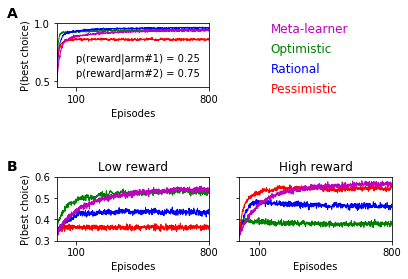

In [6]:
# The left panel of figure 4B:
plt.subplot(3,2,5)
plt.plot(meanPerformanceOptimisticLow, 'g', linewidth=1)
plt.plot(meanPerformanceRationalLow, 'b', linewidth=1)
plt.plot(meanPerformancePessimisticLow, 'r', linewidth=1) 
plt.plot(meanPerformanceMetaLearnerLow, 'm', linewidth=1)

plt.title('Low reward')
plt.axis([0, 800, .3, .6])

plt.yticks([.3, .4, .5, .6])
plt.ylabel('P(best choice)')

plt.xticks([100, 800])
plt.xlabel('Episodes')

# The right panel of figure 4B:
plt.subplot(3,2,6)
plt.plot(meanPerformanceOptimisticHigh, 'g', linewidth=1)
plt.plot(meanPerformanceRationalHigh, 'b', linewidth=1)
plt.plot(meanPerformancePessimisticHigh, 'r', linewidth=1) 
plt.plot(meanPerformanceMetaLearnerHigh, 'm', linewidth=1)

plt.title('High reward')
plt.axis([0, 800, .3, .6])
plt.yticks([.3, .4, .5, .6], ('','','',''))
plt.xticks([100, 800])
plt.xlabel('Episodes')

plt.savefig('Figure4.png', dpi=150)
plt.show()